In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal


Populating the interactive namespace from numpy and matplotlib


# Comparative Transrate metrics

* Proportion of references with a CRB-BLAST hit 
* Reciprocal best hits where the top match in one direction is the same as the top match in the other direction. 
* Selects all alignments with e-values below the cutoff for each length as high-confidence predicted homologs
* Metrics: http://hibberdlab.com/transrate/metrics.html

### Linking MMETSP and SRR number 
- Enable cross comparison of the NCGR to Trinity assemblies

In [2]:
sra_run = pd.read_csv('../SraRunInfo.csv')
sra_map = sra_run[['Run', 'SampleName']]

In [3]:
file_dib_v_ncgr = "../assembly_evaluation_data/transrate_reference_scores_nt.csv"
file_ncgr_v_dib = "../assembly_evaluation_data/transrate_reverse_scores_nt.csv"

# Load in df and add the mmetsp/sra information
dib_v_ncgr = pd.read_csv(file_dib_v_ncgr)
dib_v_ncgr = pd.merge(sra_map, dib_v_ncgr, on='Run')
ncgr_v_dib = pd.read_csv(file_ncgr_v_dib)
ncgr_v_dib = pd.merge(sra_map, ncgr_v_dib, on='SampleName')

#Set indexing value
ncgr_v_dib = ncgr_v_dib.set_index('Run')
dib_v_ncgr = dib_v_ncgr.set_index('Run')

dib_v_ncgr = dib_v_ncgr.drop_duplicates()
ncgr_v_dib = ncgr_v_dib.drop_duplicates()
                           

### Plotting functions 


In [4]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#F5B041', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    newdf = pd.DataFrame()
    newdf[df1name] = df1[column]
    newdf[df2name] = df2[column]
    newdf = newdf.dropna()
    newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < then df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

## Checking out different variables reported by transrate

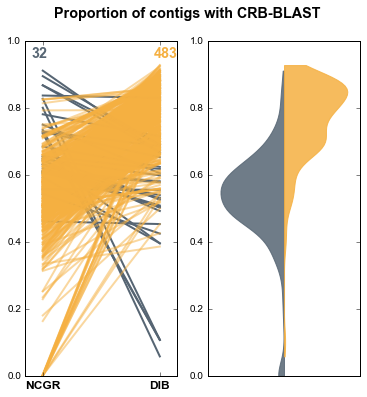

In [5]:
p_refs_with_CRBB, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST')

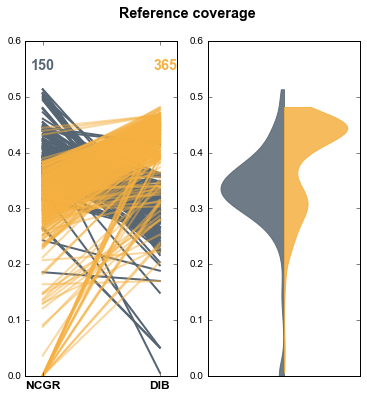

In [6]:
reference_coverage, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.6, ypos = 0.55)

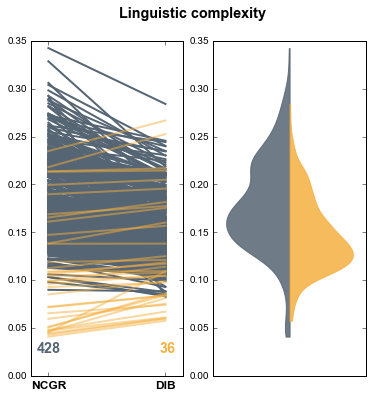

In [7]:
linguistic_complexity, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'linguistic_complexity', 'Linguistic complexity', ymax=0.35, ypos=0.025)

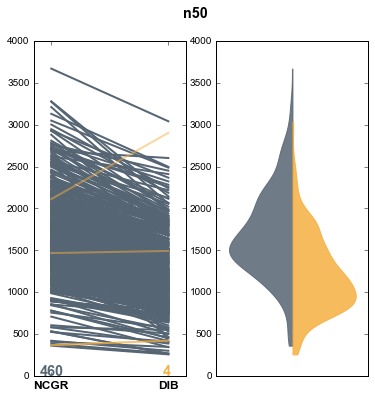

In [8]:
n50, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'n50', 'n50', ymax=4000)

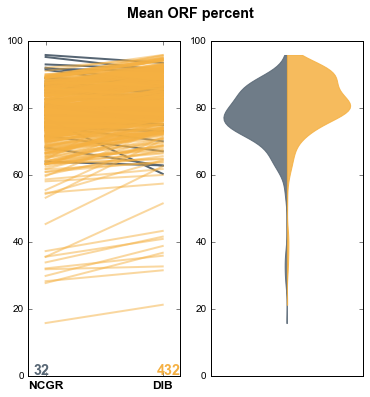

In [9]:
mean_orf_percent, fig, ax = create_plots(ncgr_v_dib, dib_v_ncgr, 'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)